In [11]:
import numpy as np
import os
import glob
import cv2
from skimage.io import imshow
import matplotlib.pyplot as plt

In [5]:
images_dir = 'all_images/'

In [6]:
count_images = len(os.listdir(images_dir))
count_images

24

In [9]:
images_path = glob.glob(images_dir+'/*')
images_list=[]

for each_image in images_path:
    img=cv2.imread(each_image,cv2.IMREAD_COLOR)
    images_list.append(img)
    
images_arr = np.array(images_list)

# Cropping

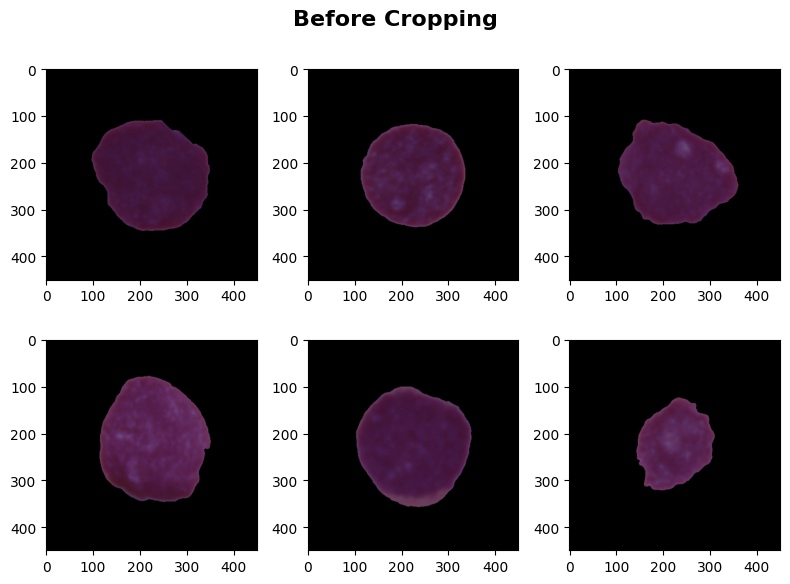

In [149]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i < len(images_arr):
        # Plot the i-th image in the array
        ax.imshow(images_arr[i], cmap='gray')
        #ax.set_title(f'Image {i}')
    else:
        ax.axis('off')
fig.suptitle('Before Cropping', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

In [94]:
def crop(arr):
    cropped_images=[]
    for each_image in arr:
        cropped_image = each_image[90:-90, 90:-90, :]
        cropped_images.append(cropped_image)
        
    cropped=np.array(cropped_images)
    return cropped

In [29]:
cropped_images_arr=crop(images_arr)

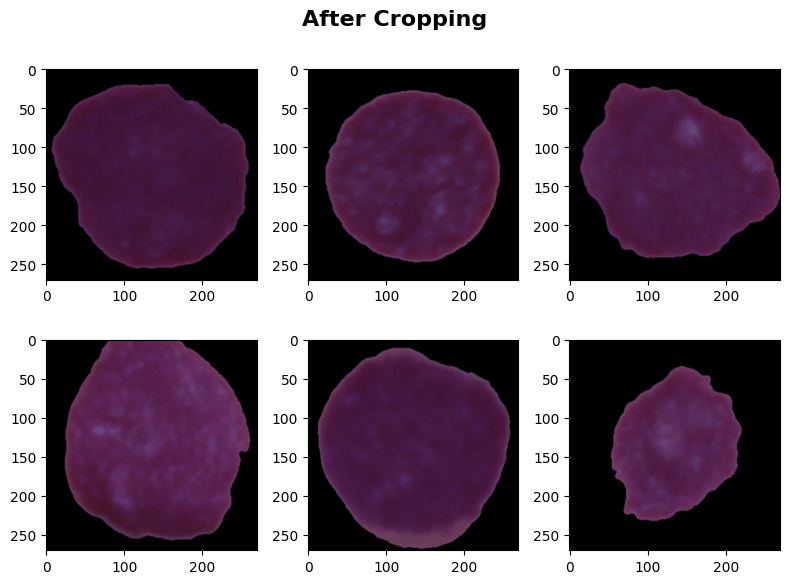

In [148]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i < len(cropped_images_arr):
        # Plot the i-th image in the array
        ax.imshow(cropped_images_arr[i], cmap='gray')
        #ax.set_title(f'Image {i}')
    else:
        ax.axis('off')
fig.suptitle('After Cropping', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

Most of the cropped images remain within the bounds

# Side-by-Side Comparison of Cancerous and Healthy Cells
**For visual similarities or differences**

In [109]:
cancerous_dir='all_images/cancerous/'
healthy_dir='all_images/healthy/'

In [110]:
cancerous_images_path = glob.glob(cancerous_dir+'/*')
healthy_images_path = glob.glob(healthy_dir+'/*')

cancerous_images_list=[]
healthy_images_list=[]

for each_cancerous_image,each_healthy_image in zip(cancerous_images_path,healthy_images_path):
    cancer_img=cv2.imread(each_cancerous_image,cv2.IMREAD_COLOR)
    cancerous_images_list.append(cancer_img)
    healthy_img=cv2.imread(each_healthy_image,cv2.IMREAD_COLOR)
    healthy_images_list.append(healthy_img)
    
cancerous_images_arr = np.array(cancerous_images_list)
healthy_images_arr = np.array(healthy_images_list)

In [111]:
#crop the images
cropped_cancerous_arr=crop(cancerous_images_arr)
cropped_healthy_arr=crop(healthy_images_arr)

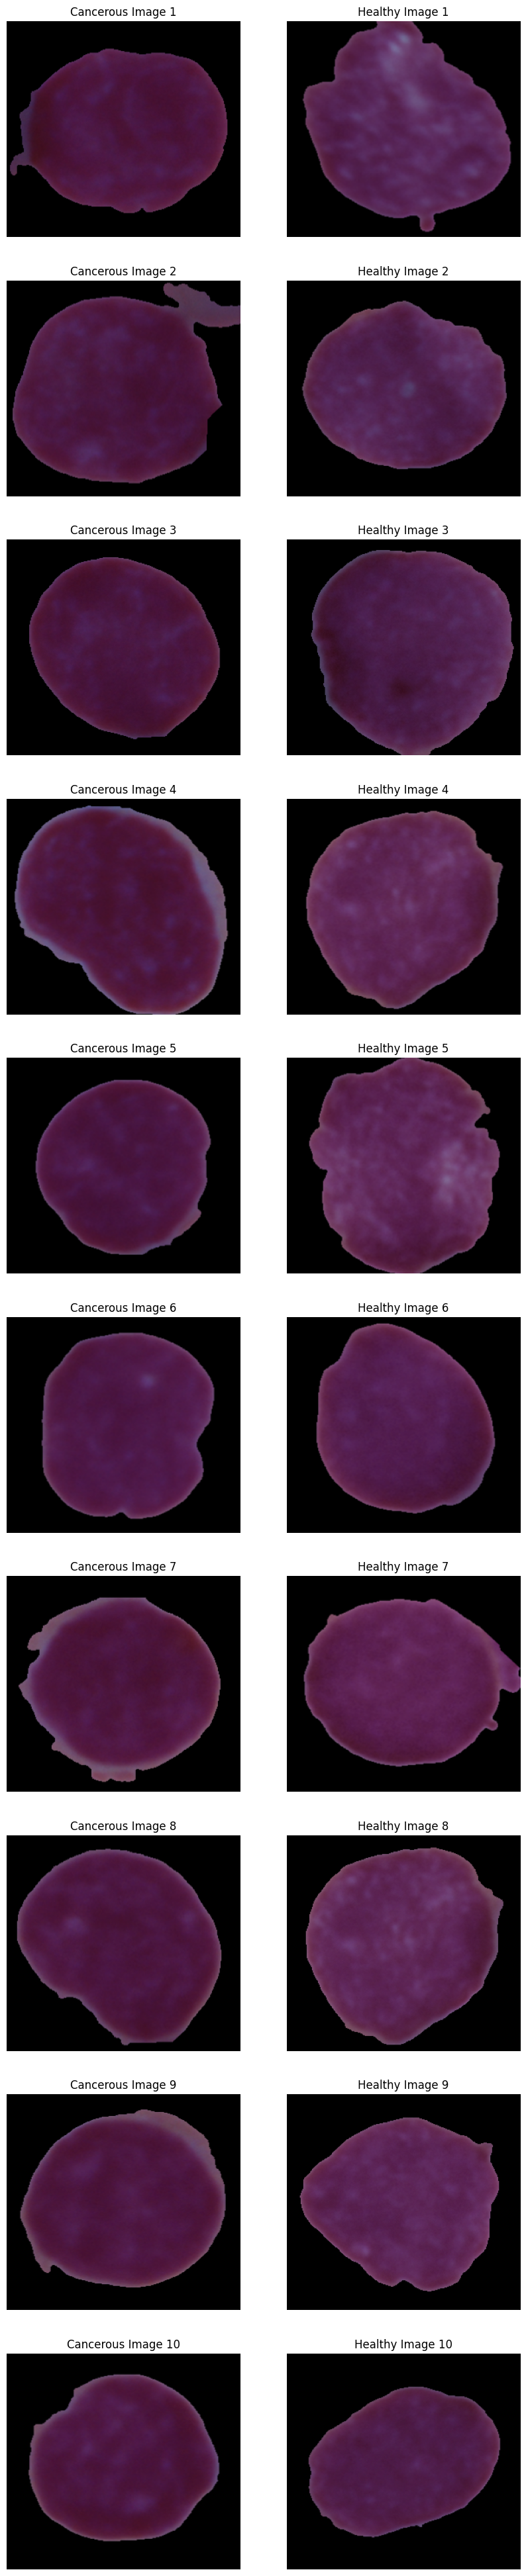

In [117]:
num_images = min(len(cropped_cancerous_arr), len(cropped_healthy_arr))

fig, axes = plt.subplots(nrows=num_images, ncols=2, figsize=(10, num_images * 5))

for i in range(num_images):
    # Display each image from 'cropped_cancerous_arr' in the left column and each image from 'cropped_healthy_arr' in the right column
    axes[i, 0].imshow(cropped_cancerous_arr[i], aspect='auto')
    axes[i, 0].set_title('Cancerous Image ' + str(i + 1))
    axes[i, 0].axis('off')
    
    if i < len(cropped_healthy_arr):
        axes[i, 1].imshow(cropped_healthy_arr[i], aspect='auto')
        axes[i, 1].set_title('Healthy Image ' + str(i + 1))
        axes[i, 1].axis('off')

# Show the plot
plt.show()


**Visual Differences:** White spots are more dense in healthy cells than cancerous cells

In [116]:
# num_images = min(len(cropped_cancerous_arr), len(cropped_healthy_arr))

# fig, axes = plt.subplots(nrows=num_images, ncols=2, figsize=(10, 60))

# for i in range(len(cropped_cancerous_arr)):
#     # Display each image from 'cropped_cancerous_arr' in the left column and each image from 'cropped_healthy_arr' in the right column
#     axes[i, 0].imshow(cropped_cancerous_arr[i], aspect='auto')
#     axes[i, 0].set_title('Cancerous Image ' + str(i + 1))
#     axes[i, 0].axis('off')
#     axes[i, 1].imshow(cropped_healthy_arr[i], aspect='auto')
#     axes[i, 0].set_title('Healthy Image ' + str(i + 1))
#     axes[i, 1].axis('off')

# plt.show()

# Image Enhancements
### Contrast stretching 

In [121]:
min_value = np.min(cropped_healthy_arr[0])
max_value = np.max(cropped_healthy_arr[0])

In [122]:
min_value, max_value

(0, 151)

In [127]:
new_min = 0
new_max = 255
#map pixel values to new range using linear interpolation
stretched_image = np.interp(cropped_healthy_arr[0], (min_value, max_value), (new_min, new_max))
stretched_image = stretched_image.astype(np.uint8)

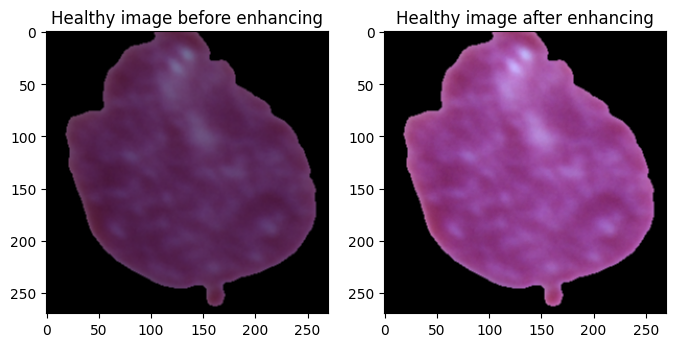

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax[0].imshow(cropped_healthy_arr[0], cmap='gray')
ax[0].set_title('Healthy image before enhancing')

ax[1].imshow(stretched_image, cmap='gray')
ax[1].set_title('Healthy image after enhancing')

plt.show()

### Histogram Equalization

In [134]:
from skimage import exposure

equalized_image = exposure.equalize_hist(cropped_healthy_arr[0])
equalized_image = (equalized_image * 255).astype(np.uint8)

C:\Users\oo_wa\.conda\envs\NN\lib\site-packages\skimage\_shared\utils.py:326: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


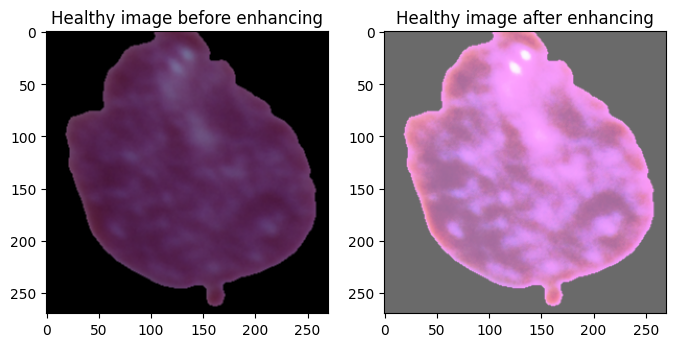

In [135]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax[0].imshow(cropped_healthy_arr[0], cmap='gray')
ax[0].set_title('Healthy image before enhancing')

ax[1].imshow(equalized_image, cmap='gray')
ax[1].set_title('Healthy image after enhancing')

plt.show()

### Adaptive Histogram Equalization

In [137]:
# Set the size of the local neighborhood for AHE (optional)
neighborhood_size = 100

# Apply adaptive histogram equalization
equalized_image = exposure.equalize_adapthist(cropped_healthy_arr[0], clip_limit=0.03, nbins=256)
equalized_image = (equalized_image * 255).astype(np.uint8)

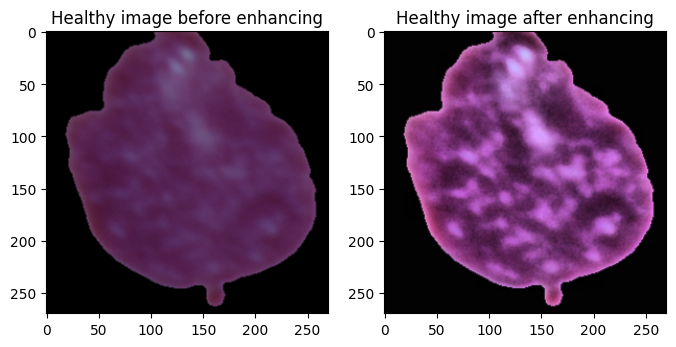

In [138]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax[0].imshow(cropped_healthy_arr[0], cmap='gray')
ax[0].set_title('Healthy image before enhancing')

ax[1].imshow(equalized_image, cmap='gray')
ax[1].set_title('Healthy image after enhancing')

plt.show()

In [139]:
# Set the size of the local neighborhood for AHE (optional)
neighborhood_size = 100

# Apply adaptive histogram equalization
equalized_image = exposure.equalize_adapthist(cropped_healthy_arr[0], clip_limit=0.03, nbins=neighborhood_size)
equalized_image = (equalized_image * 255).astype(np.uint8)

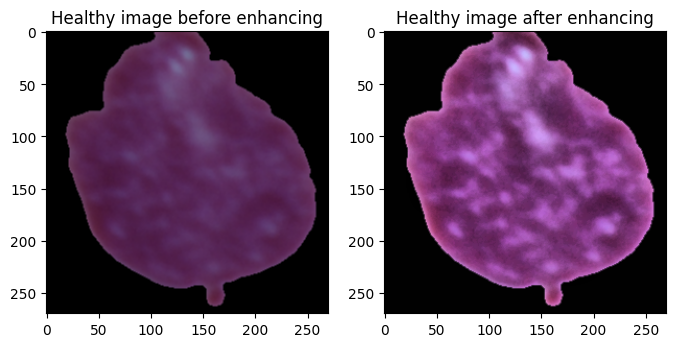

In [140]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax[0].imshow(cropped_healthy_arr[0], cmap='gray')
ax[0].set_title('Healthy image before enhancing')

ax[1].imshow(equalized_image, cmap='gray')
ax[1].set_title('Healthy image after enhancing')

plt.show()

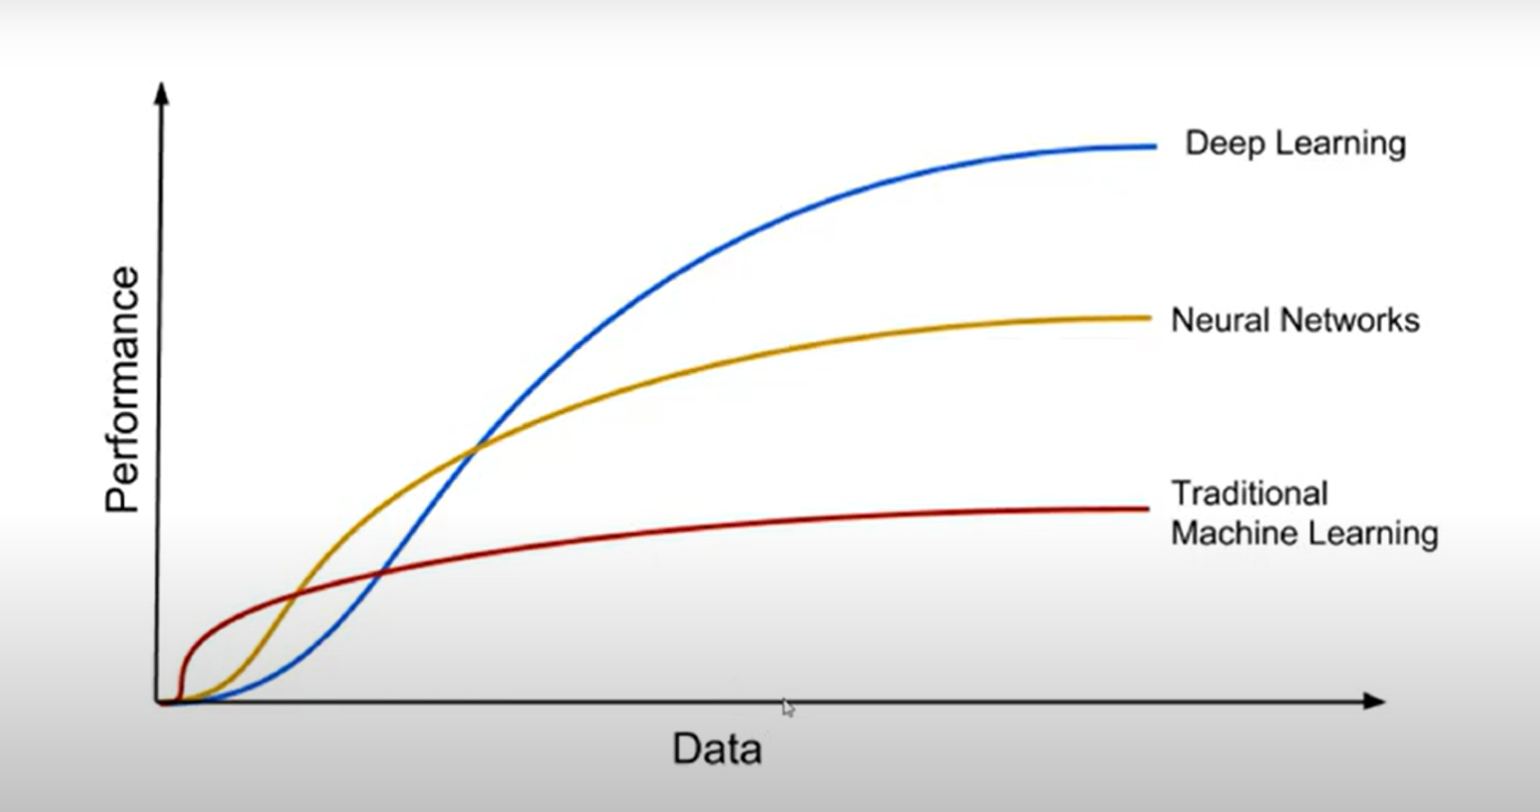